## Imports

In [1]:
import keras
import pandas as pd
import matplotlib.pyplot as plt

## Load Model / Data

In [2]:
# Load the saved model
model = keras.models.load_model("./data/trained_models/best.h5")

In [165]:
# Load the CSV file into a Pandas DataFrame
file = './data/testManipulation.csv'
testimages = pd.read_csv(file)

# Convert the DataFrame to a NumPy array and normalize the values
x_testimage = testimages.values
x = x_testimage / 255.0

# Reshape the array into a 4D tensor
x = x.reshape(-1,28,28,1)

# Print the shape of the array
print(f'Data shape is: {x.shape}')

Data shape is: (22, 28, 28, 1)


## Multiple Digit Predicition

1/1 [==============================] - 0s 33ms/step


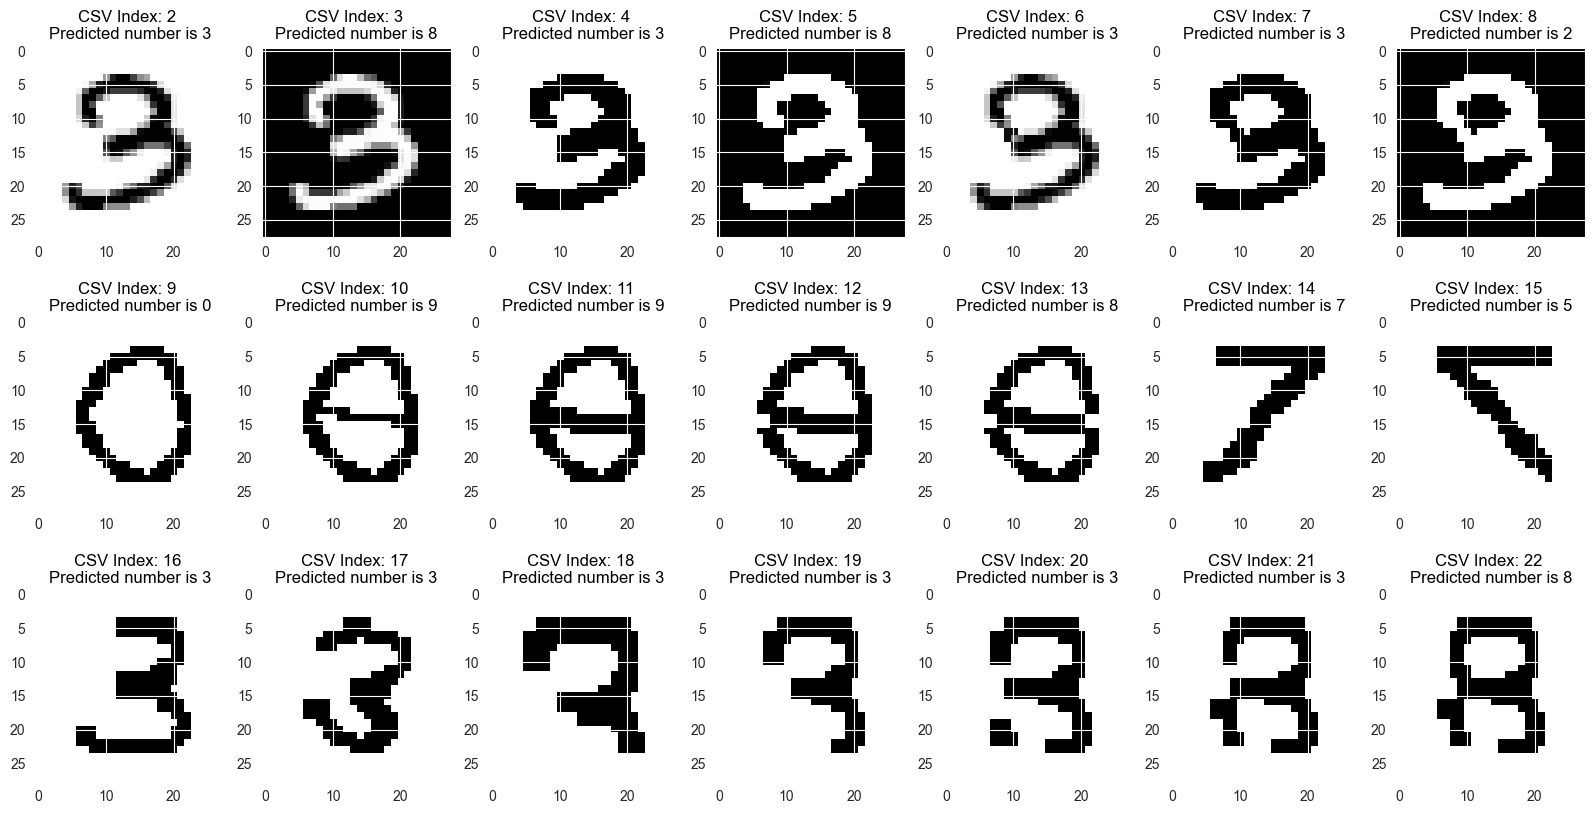

In [168]:
# Make predictions using the model
y_pred = model.predict(x)

# Create a figure with four subplots
fig, axis = plt.subplots(3, 7, figsize=(20, 10))

# Iterate over the subplots and plot the images
for i, ax in enumerate(axis.flat):
    ax.imshow(x[i], cmap='binary')
    ax.set(title = f"CSV Index: {i+2} \nPredicted number is {y_pred[i].argmax()}")

# Show the figure
plt.show()

## Explanation of the Images above
- Image 2 -> Original
- Image 3 -> Inverted
- Image 4 -> Pixel Values > 10 set to 255
- Image 5 -> Inverted (Image 4)
- Image 6 -> Pixel Manipulation
- Image 7 -> Pixel Values > 10 set to 255 (Image 6)
- Image 8 -> Inverted (Image 7)
- Image 9 - 15 -> Handwritten
    - Image 15 Note: Flipped images are not trained (see Data Augmentation)

## Prediction Skript

In [ ]:
# COLOR = 'black'
# plt.rcParams['text.color'] = COLOR
# plt.rcParams['axes.labelcolor'] = COLOR
#
# def predict(model, image):
#   class_names = ['Null', 'Eins', 'Zwei', 'Drei', 'Vier',
#                'Fünf', 'Sechs', 'Sieben', 'Acht', 'Neun']
#   prediction = model.predict(np.array([image]))
#   predicted_class = class_names[np.argmax(prediction)]
#   show_image(image, predicted_class)
#
# def show_image(img, guess):
#   plt.figure()
#   imgX = img.reshape(28,28)
#   plt.imshow(imgX, cmap=plt.cm.binary) #, cmap=plt.cm.binary
#   plt.title("Predicted: " + guess )
#   plt.colorbar()
#   plt.grid(False)
#   plt.show()
#
# def get_number():
#   while True:
#     num = input("Pick a number: ")
#     if num.isdigit():
#       num = int(num)
#       if 0 <= num <= 1000:
#         return int(num)
#     else:
#       print("Try again...")
#
# num = get_number()
# image = x[num]
# predict(model, image)